In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Zoo.csv to Zoo.csv


In [3]:
zoo = pd.read_csv('Zoo.csv')
zoo

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


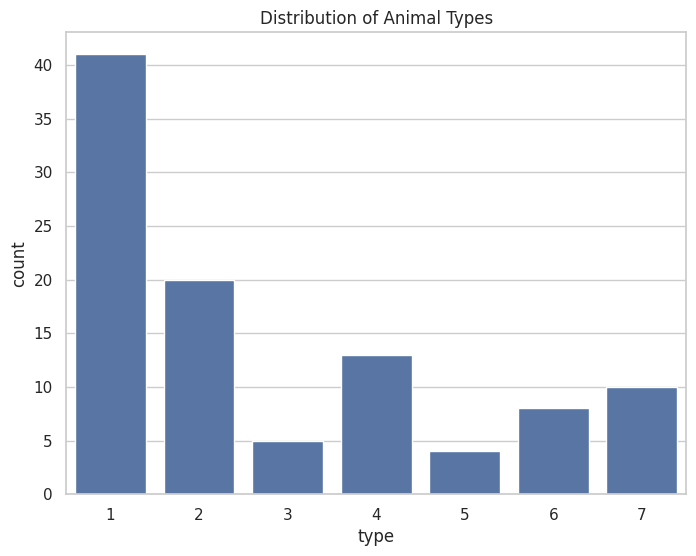

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# Visualizing the distribution of the target variable (type of animal)
plt.figure(figsize=(8, 6))
sns.countplot(x='type', data=zoo)
plt.title('Distribution of Animal Types')
plt.show()

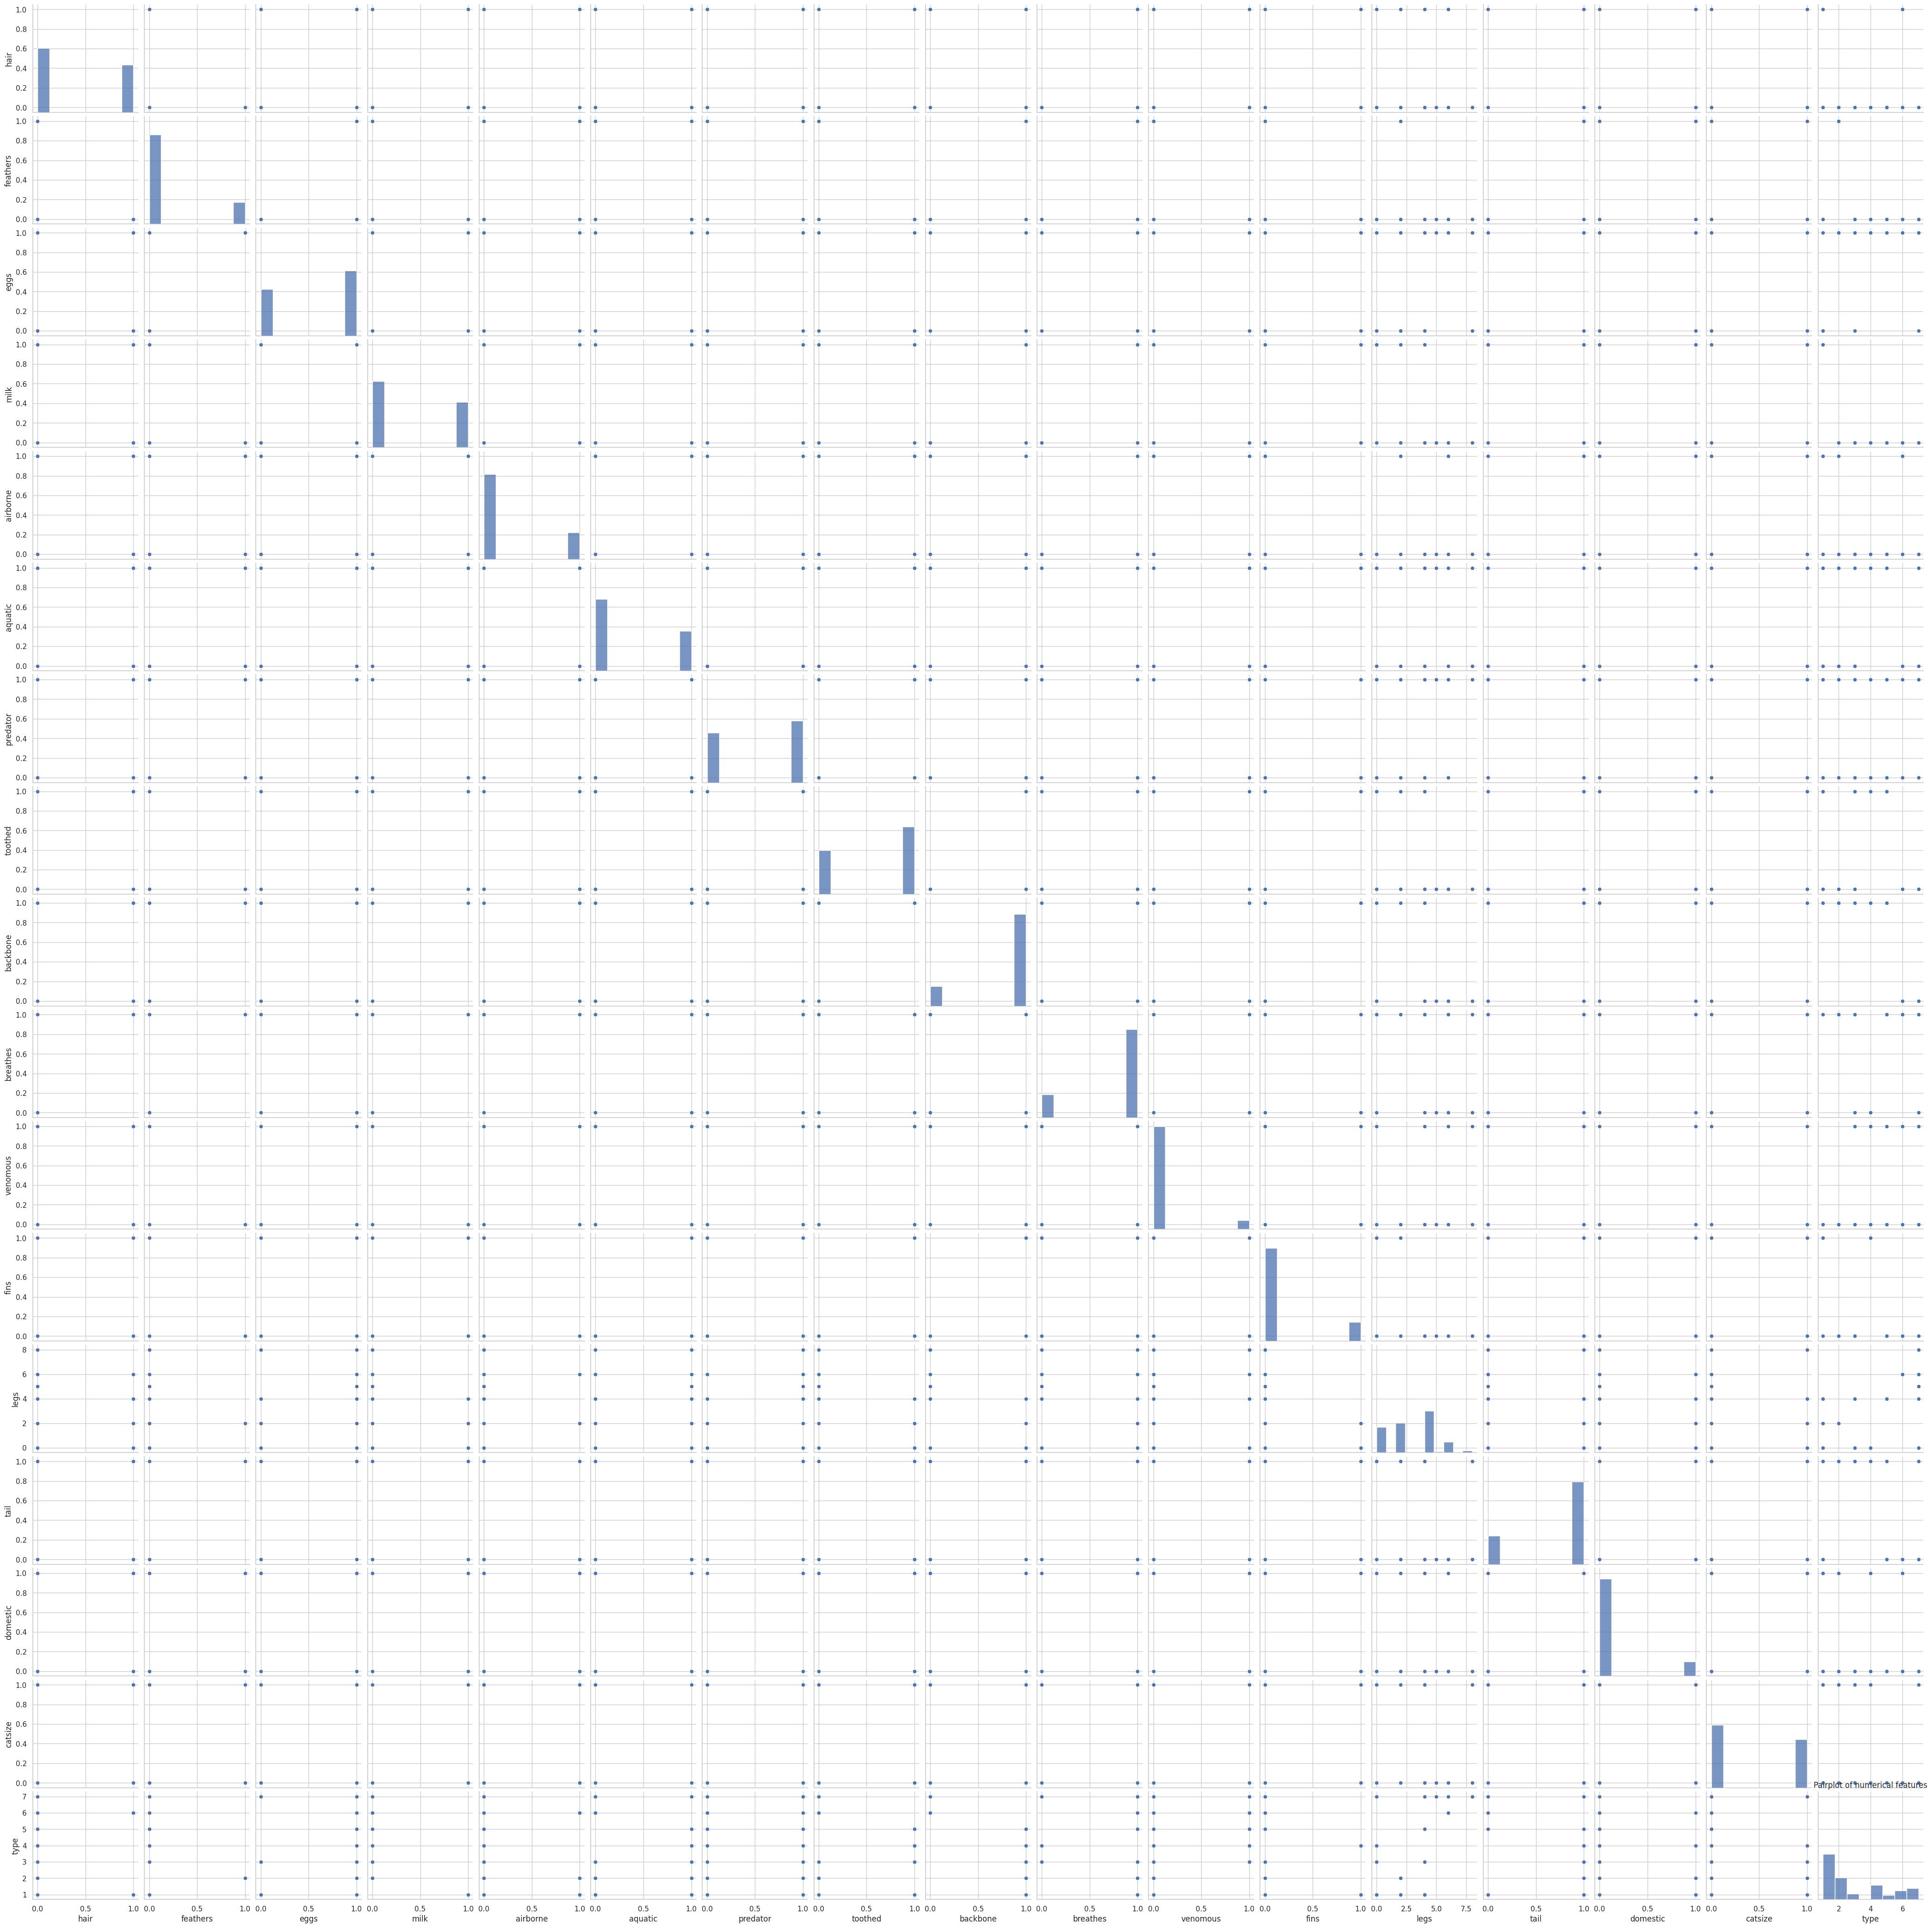

In [5]:
# Pairplot of features (for continuous features only)
# Checking if there are numerical features for pairplotting
numeric_cols = zoo.select_dtypes(include=['float64', 'int64']).columns.tolist()

if len(numeric_cols) > 1:
    sns.pairplot(zoo[numeric_cols])
    plt.title("Pairplot of numerical features")
    plt.show()

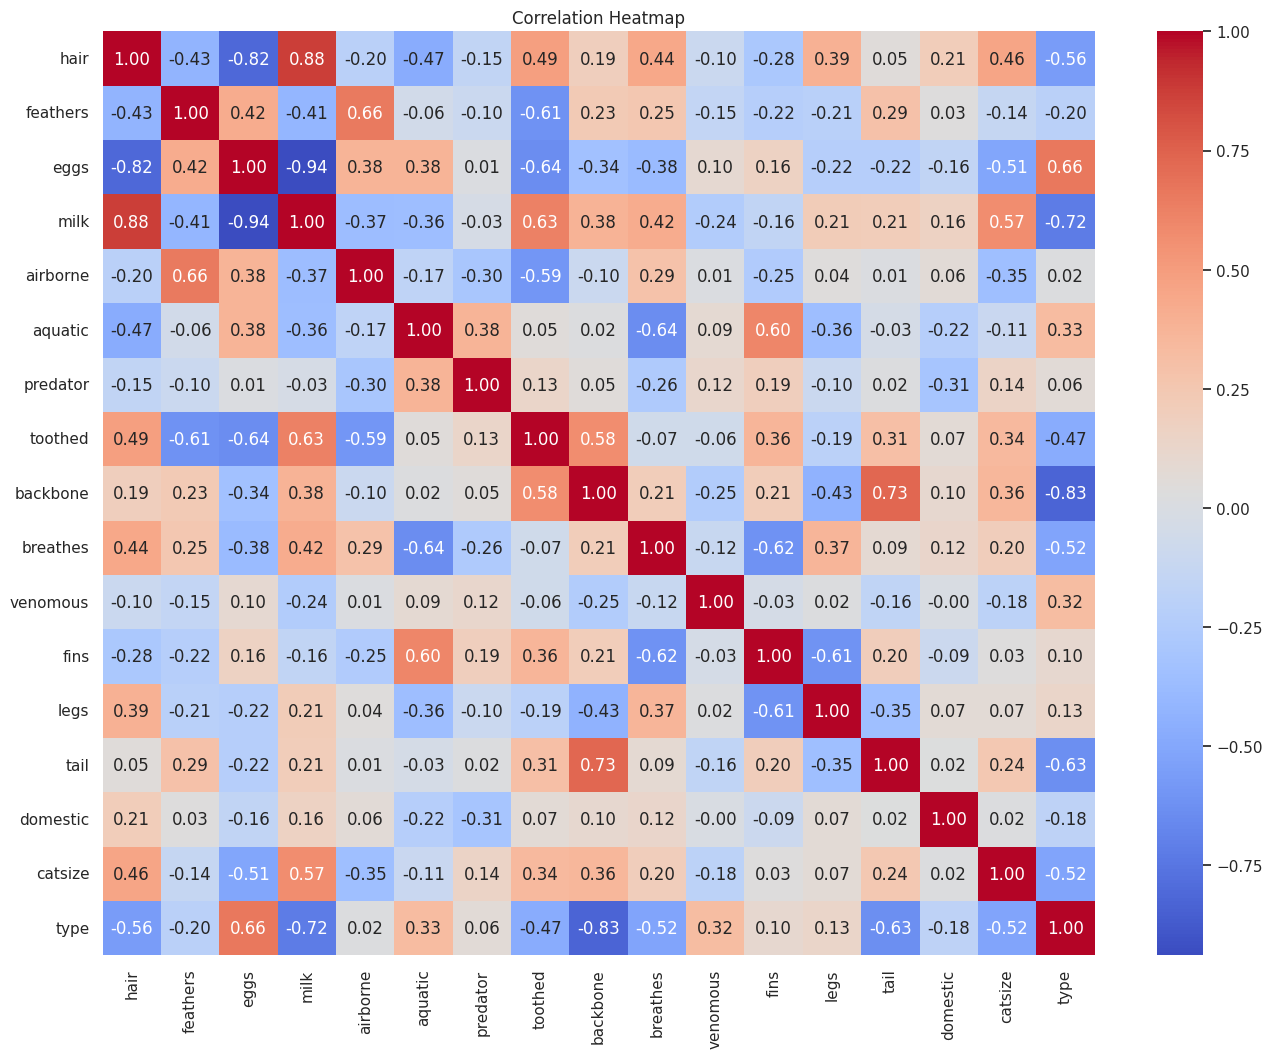

In [6]:
# Correlation heatmap
plt.figure(figsize=(16, 12))
corr_matrix = zoo.drop('animal name', axis=1).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

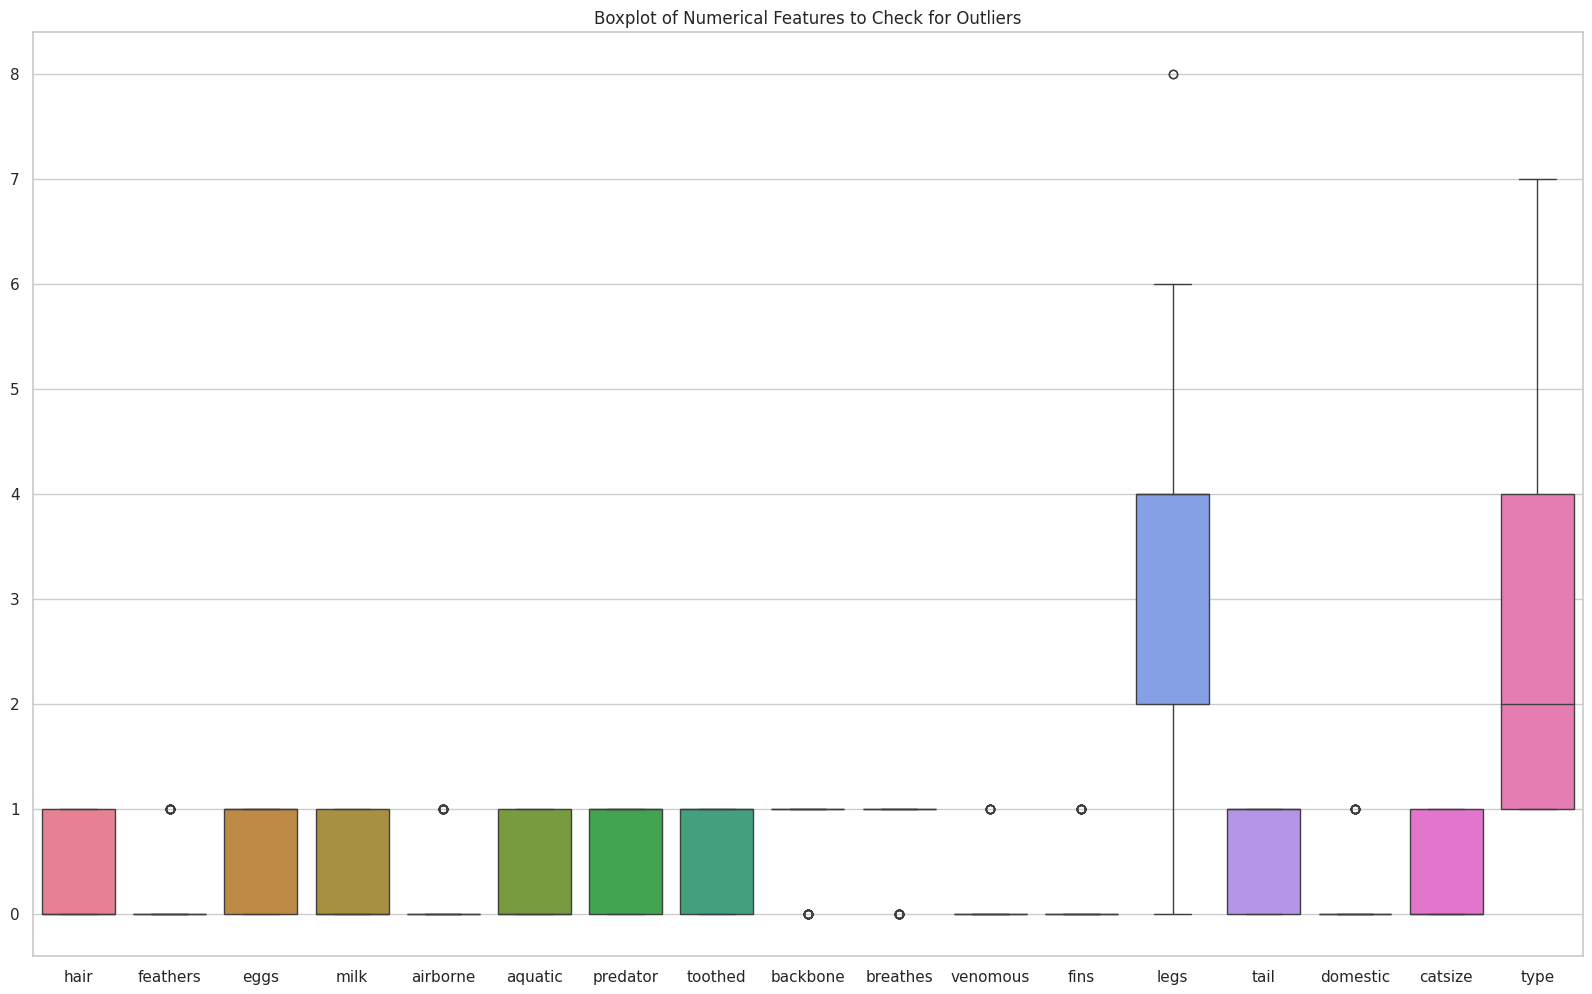

In [7]:
# Boxplot to check for outliers in numerical features
plt.figure(figsize=(20, 12))
sns.boxplot(data=zoo[numeric_cols])
plt.title("Boxplot of Numerical Features to Check for Outliers")
plt.show()

In [8]:
missing_values = zoo.isnull().sum()
# Display columns with missing values, if any
missing_values[missing_values > 0]

,0


In [9]:
from scipy import stats
# Calculating Z-scores for numeric columns
z_scores = stats.zscore(zoo[numeric_cols])
# Threshold for defining an outlier
outliers = (abs(z_scores) > 3).any(axis=1)
# Removing outliers
zoo_no_outliers = zoo[~outliers]
# Checking how many outliers were removed
print(f'Number of outliers removed: {outliers.sum()}')

Number of outliers removed: 8


In [10]:
from sklearn.model_selection import train_test_split
# Defining feature variables (X) and target variable (y)
X = zoo.drop('type', axis=1)
y = zoo['type']

# Splitting the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Checking the size of the splits
print(f'Training set size: {X_train.shape}')
print(f'Testing set size: {X_test.shape}')

Training set size: (80, 17)
Testing set size: (21, 17)


In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
# Initializing the KNN model
knn = KNeighborsClassifier()

# Defining a parameter grid for GridSearchCV to find the best value for K and distance metric
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Different K values to test
    'metric': ['euclidean', 'manhattan']  # Different distance metrics to test
}

# Using GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')  # 5-fold cross-validation
grid_search.fit(X_train, y_train)

# Getting the best model parameters
best_knn = grid_search.best_estimator_

# Making predictions on the test set
y_pred = best_knn.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Best parameters: {grid_search.best_params_}")

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Best parameters: {'metric': 'euclidean', 'n_neighbors': 3}


In [15]:
# Training the best KNN model on the training data
best_knn.fit(X_train, y_train)

# Predicting on the test data
y_pred = best_knn.predict(X_test)

# Evaluating the model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set: {accuracy * 100:.2f}%")

# Printing classification report for detailed performance metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy on the test set: 95.24%

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         4
           3       0.00      0.00      0.00         1
           4       0.75      1.00      0.86         3
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           0.95        21
   macro avg       0.82      0.86      0.84        21
weighted avg       0.92      0.95      0.93        21



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
# Predicting on the test set
y_pred = best_knn.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Generating a detailed classification report
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred))
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"\nPrecision: {precision * 100:.2f}%")
print(f"\nRecall: {recall * 100:.2f}%")
print(f"\nF1-Score: {f1 * 100:.2f}%")

Accuracy: 95.24%

Detailed Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         4
           3       0.00      0.00      0.00         1
           4       0.75      1.00      0.86         3
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           0.95        21
   macro avg       0.82      0.86      0.84        21
weighted avg       0.92      0.95      0.93        21


Precision: 91.67%

Recall: 95.24%

F1-Score: 93.20%


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

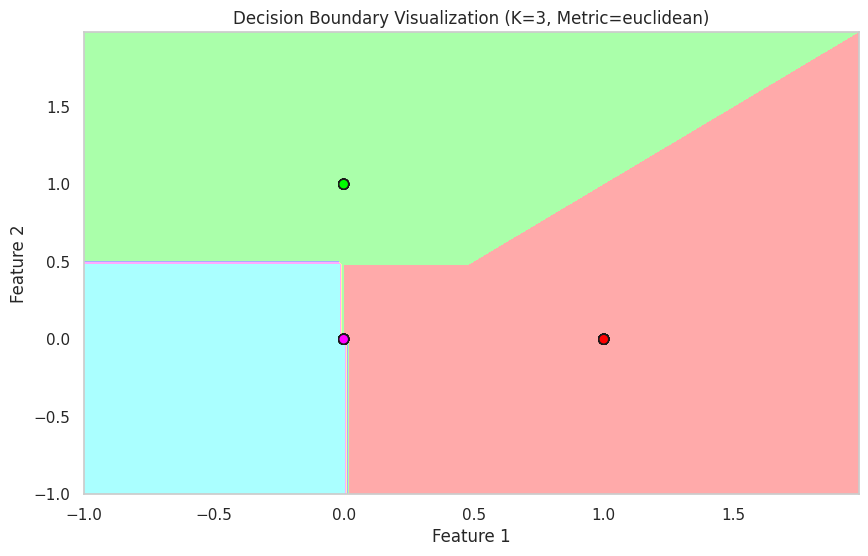

In [17]:
from matplotlib.colors import ListedColormap
X_train_2d = X_train.iloc[:, :2].values  # Selecting the first two features
X_test_2d = X_test.iloc[:, :2].values

# Training the KNN classifier on these two features
best_knn_2d = KNeighborsClassifier(n_neighbors=grid_search.best_params_['n_neighbors'],
                                   metric=grid_search.best_params_['metric'])
best_knn_2d.fit(X_train_2d, y_train)

# Creating a meshgrid for plotting decision boundaries
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predicting the class for each point in the meshgrid
Z = best_knn_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting the decision boundaries
plt.figure(figsize=(10, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF', '#FFF1AA', '#FFAAFF', '#AAFFFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF', '#FFE100', '#FF00FF', '#00FFFF'])
plt.contourf(xx, yy, Z, cmap=cmap_light)

# Plotting the training points
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, cmap=cmap_bold, edgecolor='k', s=50)
plt.title(f"Decision Boundary Visualization (K={grid_search.best_params_['n_neighbors']}, Metric={grid_search.best_params_['metric']})")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()